<a href="https://colab.research.google.com/github/HLIN30/Python-and-Machine-Learning/blob/master/Facebook_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Description: This program predicts the price of FB stock for a specific day
#             using the machine learning algorithm called
#             Support Vector Regressin (SVR) model

In [0]:
#import the packages
import csv
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [4]:
#Load the data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('FB_90_days.csv')
df.head(7)

Saving FB_90_days.csv to FB_90_days.csv


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-07,180.000000,181.179993,178.089996,179.679993,179.679993,9178300
1,2019-10-08,178.259995,180.369995,177.720001,177.750000,177.750000,9466900
2,2019-10-09,179.160004,180.720001,177.940002,179.850006,179.850006,7556900
3,2019-10-10,180.320007,181.610001,179.169998,180.029999,180.029999,8605000
4,2019-10-11,182.149994,186.490005,182.139999,184.190002,184.190002,14930500
5,2019-10-14,184.199997,184.619995,182.570007,183.279999,183.279999,7006000
6,2019-10-15,183.800003,190.380005,183.660004,188.889999,188.889999,15039100


In [0]:
#Create the lists / X and y data set
dates = []
prices = []

In [6]:
#Get the number of rows and columns in the data set
df.shape

(62, 7)

In [7]:
#Print the last row of data (this will be the data we test on)
df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
61,2020-01-03,207.210007,210.399994,206.949997,208.669998,208.669998,11188400


In [8]:
#Get all of data except for the last row
df = df.head(len(df)-1)
print(df.shape)

(61, 7)


In [0]:
df_dates = df.loc[:,'Date']#Get all of rows from the date column
df_close = df.loc[:,'Close']#Get all of rows from the close column

In [0]:
#Create the independent data set 'X' as dates
for date in df_dates:
  dates.append( [int(date.split('-')[2])] )

  #Create the dependent data set 'y as prices
for close_price in df_close:
  prices.append(float(close_price))

In [15]:
#See what days were recorded in the data set
print(dates)

[[7], [8], [9], [10], [11], [14], [15], [16], [17], [18], [21], [22], [23], [24], [25], [28], [29], [30], [31], [1], [4], [5], [6], [7], [8], [11], [12], [13], [14], [15], [18], [19], [20], [21], [22], [25], [26], [27], [29], [2], [3], [4], [5], [6], [9], [10], [11], [12], [13], [16], [17], [18], [19], [20], [23], [24], [26], [27], [30], [31], [2]]


In [0]:
#Function to make predictions using 3 different support vector regression models with 3 different kernals
def predict_prices(dates, prices, x):

  #Create 3 Support Vector Regression Models
  svr_lin = SVR(kernel="linear", C=1e3)
  svr_poly = SVR(kernel='poly', C=1e3, degree=2)
  svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

  #Train the models on the dates and prices
  svr_lin.fit(dates,prices)
  svr_poly.fit(dates,prices)
  svr_rbf.fit(dates,prices)

  #Plot the models on a graph to see which has the best fit
  plt.scatter(dates, prices, color = 'black', label='Data')
  plt.scatter(dates, svr_rbf.predict(dates), color = 'red', label='RBF model')
  plt.scatter(dates, svr_rbf.predict(dates), color = 'green', label='Linear model')
  plt.scatter(dates, svr_rbf.predict(dates), color = 'blue', label='Polynomial model')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.title('Support Vector Regression')
  plt.legend()
  plt.show()

#return all three model predictions
  return svr_rbf.predict(x)[0],svr_lin.predict(x)[0],svr_poly.predict(x)[0],

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


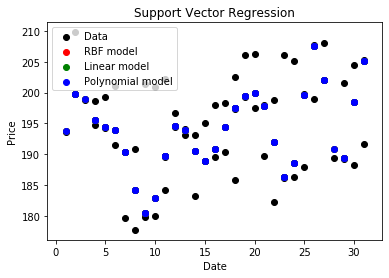

(205.14996217531314, 199.9849919992855, 202.65713963795)


In [20]:
#Predict the price of FB on day 6
predicted_price = predict_prices(dates, prices, [[6]])
print(predicted_price)